In [1]:
import time      # for testing use only
import os         # for testing use only

import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import requests 
import re
import csv
from itertools import count
import math
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('EDA_data.csv', index_col=0)
df

,Overall Pick,Teams,year,College,Seasons in NBA,# Games,Minutes Played,Points,Total Rebounds,Assists,...,Points per Game,Total Rebounds per Game,Assists per Game,Win Shares,Win Shares per 48 Minutes,Box +-,VORP,Height,Weight,First Position
0,1,DET,2021,Oklahoma State,1,40,1293,642,219,214,...,16.1,5.5,5.4,-0.3,-0.013,-1.7,0.1,198.120000,99.790240,Point Guard
1,3,CLE,2021,USC,1,42,1447,634,343,109,...,15.1,8.2,2.6,3.7,0.121,1.1,1.1,210.127273,97.522280,Power Forward
2,4,TOR,2021,Florida State,1,39,1405,579,303,137,...,14.8,7.8,3.5,3.1,0.106,0.1,0.7,207.125455,102.965384,Power Forward
3,5,ORL,2021,Gonzaga,1,30,846,372,110,120,...,12.4,3.7,4.0,-1.1,-0.065,-5.4,-0.7,192.116364,92.986360,Point Guard
4,8,ORL,2021,Michigan,1,51,1648,801,236,150,...,15.7,4.6,2.9,2.6,0.077,-0.9,0.5,207.125455,102.058200,Small Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,19,CIN,1970,Texas-El Paso,13,876,31159,16481,2046,6476,...,18.8,2.3,7.4,83.4,0.128,0.4,12.9,183.110909,68.038800,Point Guard
2060,40,SEA,1970,Oklahoma,11,787,19571,6828,5876,1220,...,8.7,7.5,1.6,27.0,0.066,-0.4,6.3,198.120000,99.336648,Power Forward
2061,103,SDR,1970,St. John's,9,637,13630,5432,3553,1043,...,8.5,5.6,1.6,26.3,0.093,-0.2,6.3,183.411091,106.594120,Center
2063,122,DET,1970,Kentucky,9,718,22342,14659,5707,1804,...,20.4,7.9,2.5,82.3,0.177,2.3,24.3,207.125455,106.594120,Center


In [25]:
df['idx'] = range(0,2034)

In [26]:
df

,Overall Pick,Teams,year,College,Seasons in NBA,# Games,Minutes Played,Points,Total Rebounds,Assists,...,Total Rebounds per Game,Assists per Game,Win Shares,Win Shares per 48 Minutes,Box +-,VORP,Height,Weight,First Position,idx
0,1,DET,2021,Oklahoma State,1,40,1293,642,219,214,...,5.5,5.4,-0.3,-0.013,-1.7,0.1,198.120000,99.790240,Point Guard,0
1,3,CLE,2021,USC,1,42,1447,634,343,109,...,8.2,2.6,3.7,0.121,1.1,1.1,210.127273,97.522280,Power Forward,1
2,4,TOR,2021,Florida State,1,39,1405,579,303,137,...,7.8,3.5,3.1,0.106,0.1,0.7,207.125455,102.965384,Power Forward,2
3,5,ORL,2021,Gonzaga,1,30,846,372,110,120,...,3.7,4.0,-1.1,-0.065,-5.4,-0.7,192.116364,92.986360,Point Guard,3
4,8,ORL,2021,Michigan,1,51,1648,801,236,150,...,4.6,2.9,2.6,0.077,-0.9,0.5,207.125455,102.058200,Small Forward,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,19,CIN,1970,Texas-El Paso,13,876,31159,16481,2046,6476,...,2.3,7.4,83.4,0.128,0.4,12.9,183.110909,68.038800,Point Guard,2029
2060,40,SEA,1970,Oklahoma,11,787,19571,6828,5876,1220,...,7.5,1.6,27.0,0.066,-0.4,6.3,198.120000,99.336648,Power Forward,2030
2061,103,SDR,1970,St. John's,9,637,13630,5432,3553,1043,...,5.6,1.6,26.3,0.093,-0.2,6.3,183.411091,106.594120,Center,2031
2063,122,DET,1970,Kentucky,9,718,22342,14659,5707,1804,...,7.9,2.5,82.3,0.177,2.3,24.3,207.125455,106.594120,Center,2032


## Assists + Position

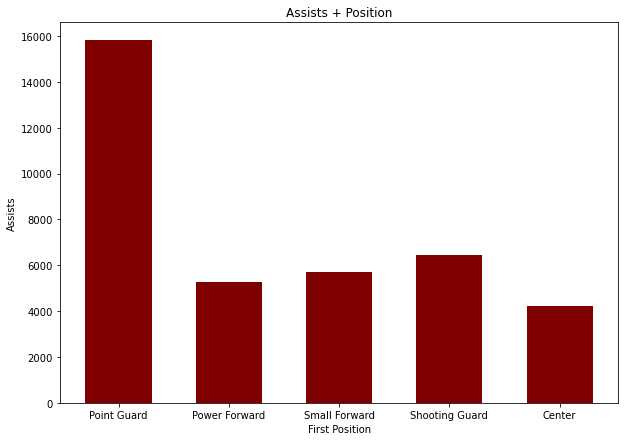

In [4]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['First Position'], df['Assists'], color ='maroon',
        width = 0.6)
 
plt.xlabel("First Position")
plt.ylabel("Assists")
plt.title("Assists + Position")
plt.show()

## Rebounds + Position

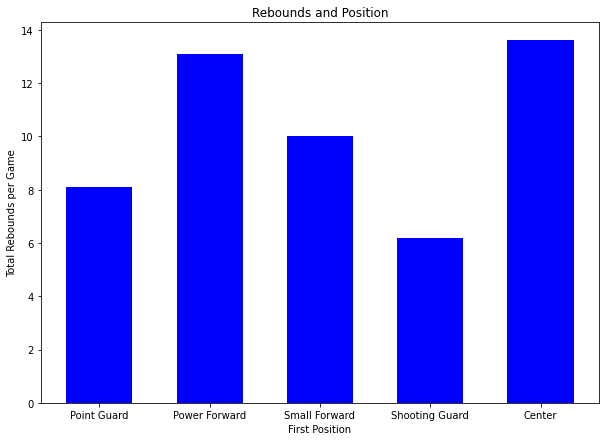

In [5]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['First Position'], df['Total Rebounds per Game'], color = 'blue',
        width = 0.6)
 
plt.xlabel("First Position")
plt.ylabel("Total Rebounds per Game")
plt.title("Rebounds and Position")
plt.show()

## Points  + Position

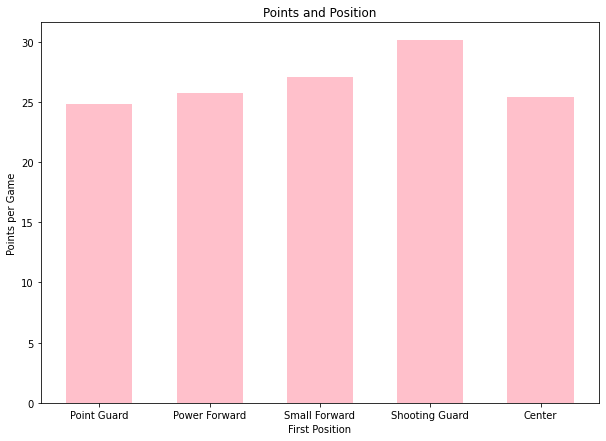

In [6]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['First Position'], df['Points per Game'], color = 'pink',
        width = 0.6)
 
plt.xlabel("First Position")
plt.ylabel("Points per Game")
plt.title("Points and Position")
plt.show()

## Position + Height

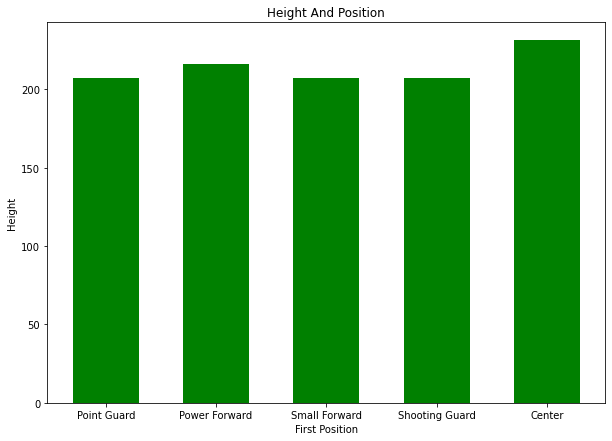

In [7]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['First Position'], df['Height'], color = 'green',
        width = 0.6)
 
plt.xlabel("First Position")
plt.ylabel("Height")
plt.title("Height And Position")
plt.show()

## The connection between Height and player position

(0.0, 600.0)

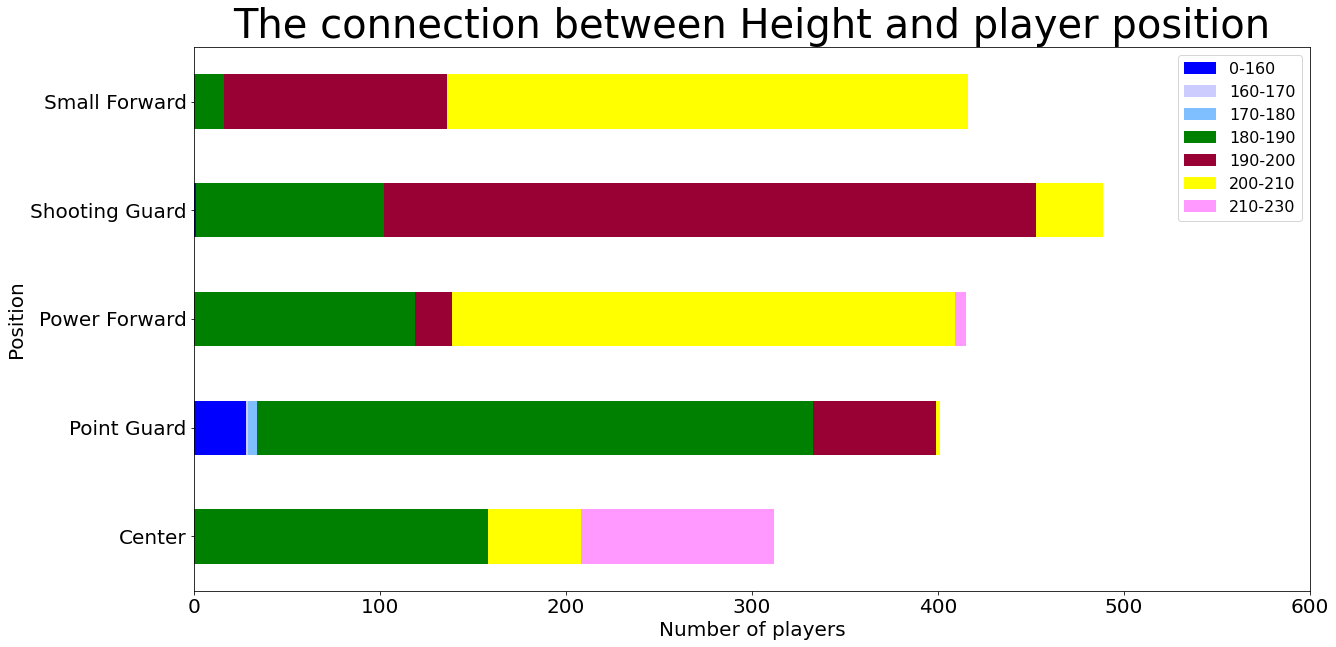

In [27]:
players_count=df.groupby("First Position").count()["idx"]
players = df[df["First Position"].isin(list(players_count.keys()))]

test = pd.cut(x=df['Height'], bins=[0,160,170,180,190,200,210,230], labels=["0-160","160-170","170-180","180-190","190-200","200-210","210-230"])
players['Height_group'] = test

players.groupby(["First Position", "Height_group"]).count()['Teams'].dropna()\
    .unstack("Height_group").fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = "The connection between Height and player position",color=['blue','#ccccff','#80bfff',
                                                                                            'green','#990033', 'yellow','#ff99ff','grey','orange',
                                                                                            'pink','salmon','#6600cc','#ff0066','#80ffbf','black',
                                                                                            '#009999','Fuchsia','red','Aqua','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('Number of players',fontsize=20)
plt.ylabel('Position',fontsize=20) 
plt.legend(fontsize=16)
plt.xlim(0,600)

In [41]:
df2 = df.copy()
df2

,Overall Pick,Teams,year,College,Seasons in NBA,# Games,Minutes Played,Points,Total Rebounds,Assists,...,Total Rebounds per Game,Assists per Game,Win Shares,Win Shares per 48 Minutes,Box +-,VORP,Height,Weight,First Position,idx
0,1,DET,2021,Oklahoma State,1,40,1293,642,219,214,...,5.5,5.4,-0.3,-0.013,-1.7,0.1,198.120000,99.790240,Point Guard,0
1,3,CLE,2021,USC,1,42,1447,634,343,109,...,8.2,2.6,3.7,0.121,1.1,1.1,210.127273,97.522280,Power Forward,1
2,4,TOR,2021,Florida State,1,39,1405,579,303,137,...,7.8,3.5,3.1,0.106,0.1,0.7,207.125455,102.965384,Power Forward,2
3,5,ORL,2021,Gonzaga,1,30,846,372,110,120,...,3.7,4.0,-1.1,-0.065,-5.4,-0.7,192.116364,92.986360,Point Guard,3
4,8,ORL,2021,Michigan,1,51,1648,801,236,150,...,4.6,2.9,2.6,0.077,-0.9,0.5,207.125455,102.058200,Small Forward,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,19,CIN,1970,Texas-El Paso,13,876,31159,16481,2046,6476,...,2.3,7.4,83.4,0.128,0.4,12.9,183.110909,68.038800,Point Guard,2029
2060,40,SEA,1970,Oklahoma,11,787,19571,6828,5876,1220,...,7.5,1.6,27.0,0.066,-0.4,6.3,198.120000,99.336648,Power Forward,2030
2061,103,SDR,1970,St. John's,9,637,13630,5432,3553,1043,...,5.6,1.6,26.3,0.093,-0.2,6.3,183.411091,106.594120,Center,2031
2063,122,DET,1970,Kentucky,9,718,22342,14659,5707,1804,...,7.9,2.5,82.3,0.177,2.3,24.3,207.125455,106.594120,Center,2032


In [42]:
test = pd.cut(x=df2['Height'], bins=[0,160,170,180,190,200,210,230], labels=["0-160","160-170","170-180","180-190","190-200","200-210","210-230"])
df2['Height_group'] = test
df2 = df2[df2['Height_group']== '0-160']
df2=df2.groupby("year").count()
df2 = df2['Height_group']
df2

year
1977    1
1982    1
1985    1
1986    2
1987    2
1988    1
1989    1
1990    1
1991    2
1992    1
1993    1
1995    3
1997    1
1998    1
2000    2
2008    1
2009    1
2013    2
2016    1
2017    1
2019    2
Name: Height_group, dtype: int64

(0.0, 600.0)

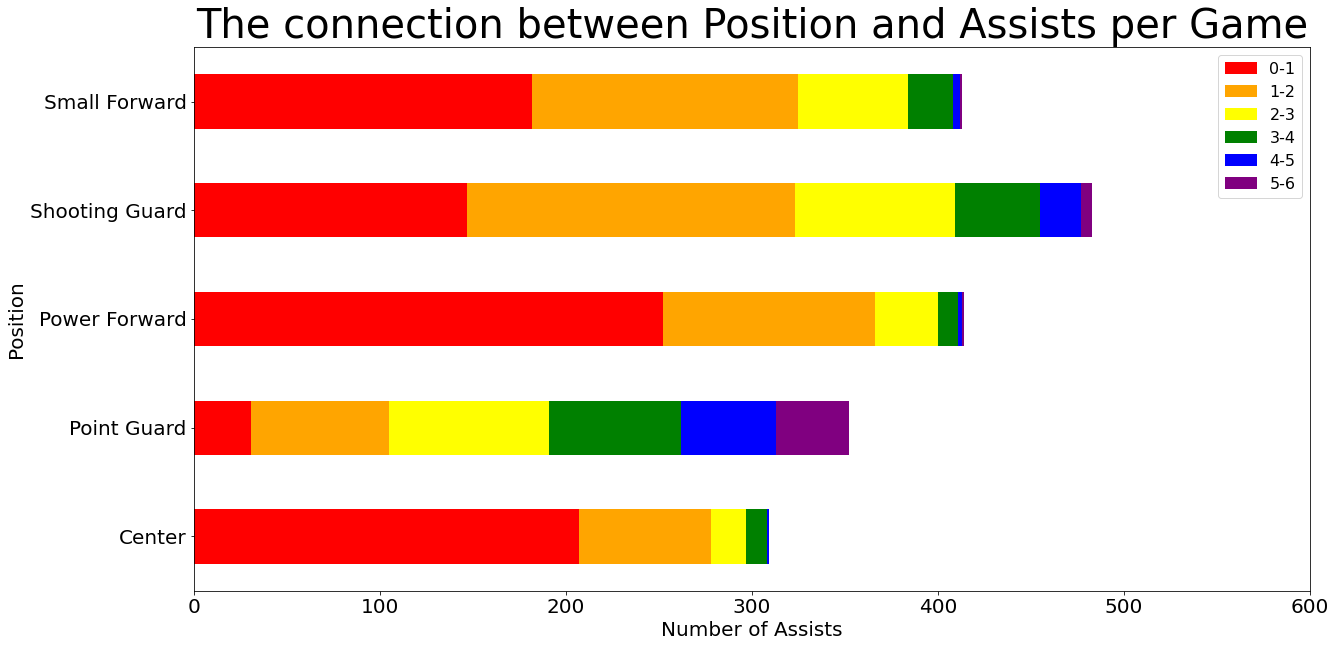

In [43]:
players_count=df.groupby("First Position").count()["idx"]
players = df[df["First Position"].isin(list(players_count.keys()))]

test = pd.cut(x=df['Assists per Game'], bins=[0,1,2,3,4,5,6], labels=["0-1","1-2","2-3","3-4","4-5","5-6"])
players['Assists per Game_group'] = test

players.groupby(["First Position", "Assists per Game_group"]).count()['Teams'].dropna()\
    .unstack("Assists per Game_group").fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = "The connection between Position and Assists per Game",color=['red','orange','yellow','green','blue','purple']).title.set_size(40)
plt.xlabel('Number of Assists',fontsize=20)
plt.ylabel('Position',fontsize=20) 
plt.legend(fontsize=16)
plt.xlim(0,600)